In [5]:
from google.colab import files
uploaded = files.upload()



Saving Netflix Dataset.csv to Netflix Dataset.csv


In [6]:
uploaded.keys()


dict_keys(['Netflix Dataset.csv'])

In [7]:
import pandas as pd

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

df.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [9]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

df['Year'] = df['Release_Date'].dt.year



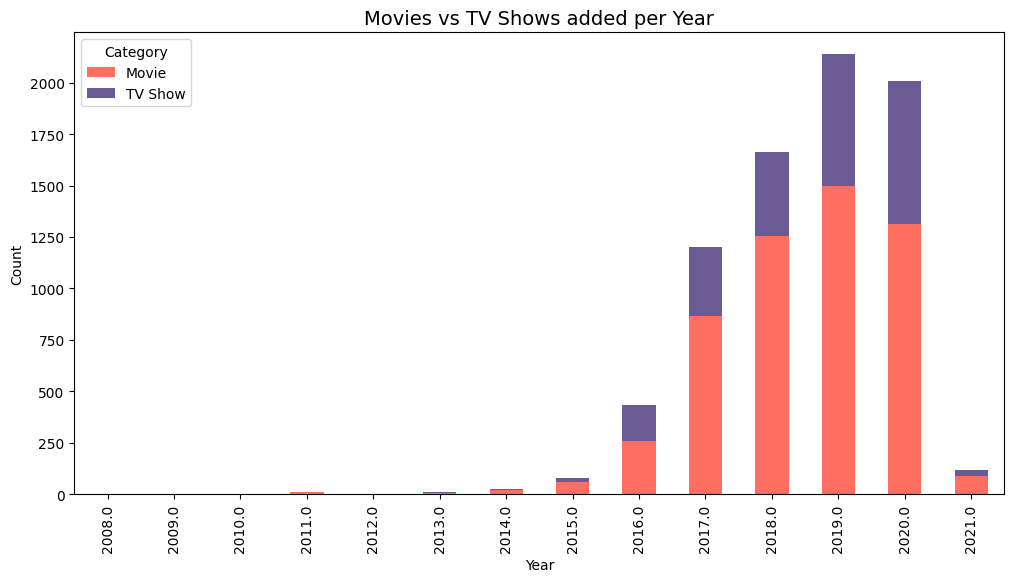

In [19]:
#Movies vs TV Shows Trend
trend = df.groupby(['Year','Category']).size().unstack(fill_value=0)

ax = trend.plot(kind='bar', figsize=(12,6), stacked=True, color=['#FF6F61','#6B5B95'])
ax.set_title("Movies vs TV Shows added per Year", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.legend(title="Category")
plt.show();


/tmp/ipython-input-931620139.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=genre_df, x='Count', y='Genre', palette="viridis")


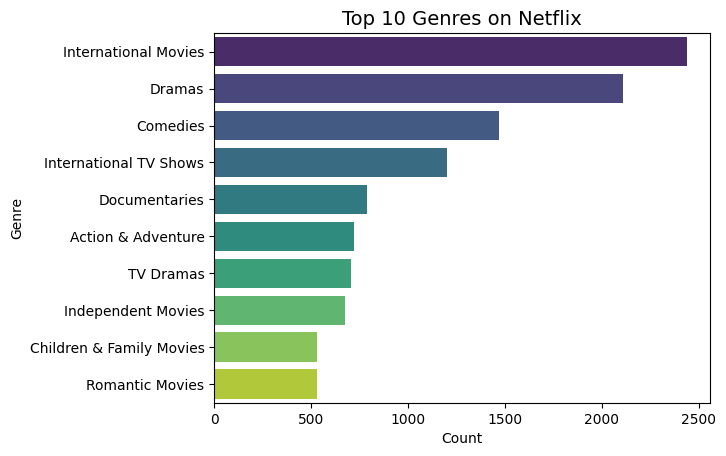

In [20]:
#Popular Top 10 genres
from collections import Counter
genres = df['Type'].dropna().str.split(', ')
all_genres = [g.strip() for sublist in genres for g in sublist]
top_genres = Counter(all_genres).most_common(10)
genre_df = pd.DataFrame(top_genres, columns=['Genre','Count'])

ax = sns.barplot(data=genre_df, x='Count', y='Genre', palette="viridis")
ax.set_title("Top 10 Genres on Netflix", fontsize=14)
plt.show();


/tmp/ipython-input-1850586210.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=country_df, x='Count', y='Country', palette="mako")


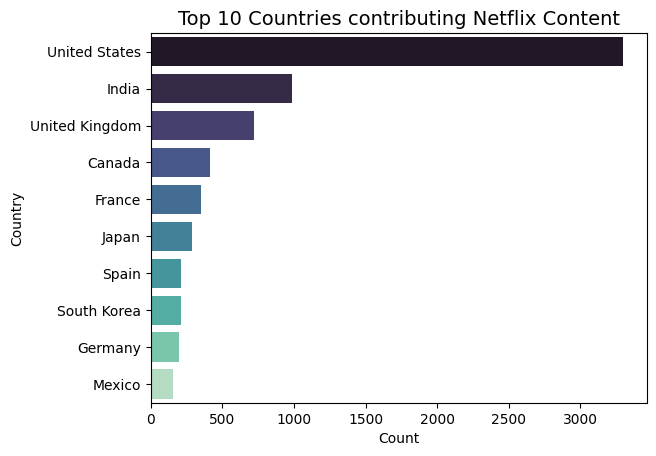

In [21]:
#Country Contribution
countries = df['Country'].dropna().str.split(', ')
all_countries = [c.strip() for sublist in countries for c in sublist]
top_countries = Counter(all_countries).most_common(10)
country_df = pd.DataFrame(top_countries, columns=['Country','Count'])

ax = sns.barplot(data=country_df, x='Count', y='Country', palette="mako")
ax.set_title("Top 10 Countries contributing Netflix Content", fontsize=14)
plt.show();



In [22]:
# Strategic Insights
print("📌 Strategic Insights from Netflix Dataset Analysis:\n")

# Movies vs TV Shows balance
more_type = "Movies" if trend['Movie'].sum() > trend['TV Show'].sum() else "TV Shows"
print(f"• Netflix overall has more **{more_type}** in its catalog.")

# Top genre
print(f"• The most common genre is **{genre_df.iloc[0,0]}**, showing strong audience preference.")

# Top contributing country
print(f"• The leading content contributor is **{country_df.iloc[0,0]}**, highlighting its global importance.")

print("\n✅ These insights can guide Netflix in refining content acquisition & production strategies.")



📌 Strategic Insights from Netflix Dataset Analysis:

• Netflix overall has more **Movies** in its catalog.
• The most common genre is **International Movies**, showing strong audience preference.
• The leading content contributor is **United States**, highlighting its global importance.

✅ These insights can guide Netflix in refining content acquisition & production strategies.
